In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install --upgrade transformers
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 91.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 21.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.5/250.5 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 94.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import string
import tqdm
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import gc
from tqdm.autonotebook import tqdm

from sklearn.metrics import accuracy_score,f1_score

import sklearn

import torch
from simpletransformers.classification import ClassificationModel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
train = pd.read_csv("/content/I-Sarcasm_train_.csv")
test = pd.read_csv("/content/I-Sarcasm_test_.csv")

In [ ]:
train.tweet[0]

"It's been a while since I visited my grandparents.#wait"

In [ ]:
test.head()

,tweet_id,tweet,sarcasm_label,sarcasm_type
0,933721764970057000,"Gandhis busy, Congress delays UP brainstorming...",sarcastic,sarcasm
1,1086119014131200000,George and the Ice Cream Castle - Charlie and ...,not_sarcastic,NaN
2,657671293756567000,Hartford House Delegation Scores Funding For C...,not_sarcastic,NaN
3,914242426755256000,Obama to rename tallest U.S. peak: To hear the...,not_sarcastic,NaN
4,1088604537211040000,So @elonmusk couldn’t care less I guess 🤷🏻‍♂️ ...,sarcastic,satire


In [ ]:
train.isna().sum()

tweet_id            0
tweet               0
sarcasm_label       0
sarcasm_type     2298
dtype: int64

In [ ]:
train["sarcasm_type"].fillna("No sarcasm",inplace=True)
train.head()

,tweet_id,tweet,sarcasm_label,sarcasm_type
0,992251158159765000,It's been a while since I visited my grandpare...,not_sarcastic,No sarcasm
1,1084373658745870000,Well done Monty. Mark that up as your first ev...,not_sarcastic,No sarcasm
2,812181186,@davesnyder since this is fantasy can it be an...,not_sarcastic,No sarcasm
3,1090276741329920000,Really? I don't think you know what you are ta...,not_sarcastic,No sarcasm
4,553070692682723000,Missed #ToughEnough tonight? No worries. Just ...,sarcastic,sarcasm


In [ ]:
test.isna().sum()

tweet_id           0
tweet              0
sarcasm_label      0
sarcasm_type     640
dtype: int64

In [ ]:
test["sarcasm_type"].fillna("No sarcasm",inplace=True)
test.head()

,tweet_id,tweet,sarcasm_label,sarcasm_type
0,933721764970057000,"Gandhis busy, Congress delays UP brainstorming...",sarcastic,sarcasm
1,1086119014131200000,George and the Ice Cream Castle - Charlie and ...,not_sarcastic,No sarcasm
2,657671293756567000,Hartford House Delegation Scores Funding For C...,not_sarcastic,No sarcasm
3,914242426755256000,Obama to rename tallest U.S. peak: To hear the...,not_sarcastic,No sarcasm
4,1088604537211040000,So @elonmusk couldn’t care less I guess 🤷🏻‍♂️ ...,sarcastic,satire


In [ ]:
# train_data=keep_uniques(train_tweets, train_data)
# test_data=keep_uniques(test_tweets, test_data)
train.drop("tweet_id",inplace=True,axis=1)

In [ ]:
test.drop("tweet_id",inplace=True,axis=1)

In [ ]:
# df = pd.read_csv(file_path, dtype={"col2": str})
# df['col2'] = df['col2'].astype(str)


In [ ]:
train.sarcasm_type.replace("#news #live #breakingnews Premarket: Blood-letting eases for global stocks, but China smashed again","No sarcasm",inplace=True)

In [ ]:
train.describe().T

,count,unique,top,freq
tweet,3577,3523,LOL...Walker is talking about education...the ...,3
sarcasm_label,3577,2,not_sarcastic,2297
sarcasm_type,3577,7,No sarcasm,2299


In [ ]:
train = train.sample(frac = 1)
test = test.sample(frac = 1)

**Value counts of individual sarcasm labels**

In [ ]:
train.sarcasm_label.value_counts()

not_sarcastic    2297
sarcastic        1280
Name: sarcasm_label, dtype: int64

**Countplot sarcasm_label(s)**

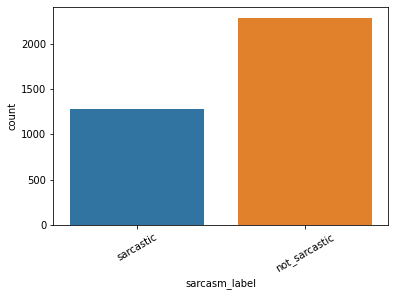

In [ ]:
sns.countplot(train.sarcasm_label)
sns.set(rc={'figure.figsize':(7,8)})
plt.xticks(rotation=30);

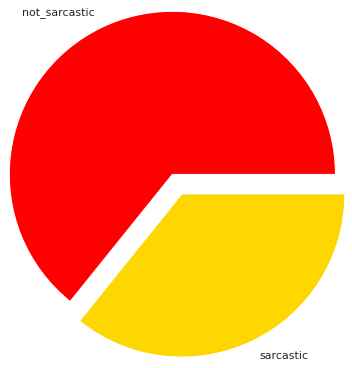

In [ ]:
# pie chart using seaborn based on total count of different sentiments in training dataset 

explode = [0.1, 0.1]
train.sarcasm_label.value_counts().plot(kind='pie',explode=explode,figsize=(5,5),radius=1.5,colors=["red", "gold", "green",'blue','purple','red']);


**Value counts of individual sarcasm types**

In [ ]:
train.sarcasm_type.value_counts()

No sarcasm             2299
sarcasm                 880
irony                   261
overstatement            47
rhetorical question      43
satire                   39
understatement            8
Name: sarcasm_type, dtype: int64

**Countplot of various sarcasm_type(s**

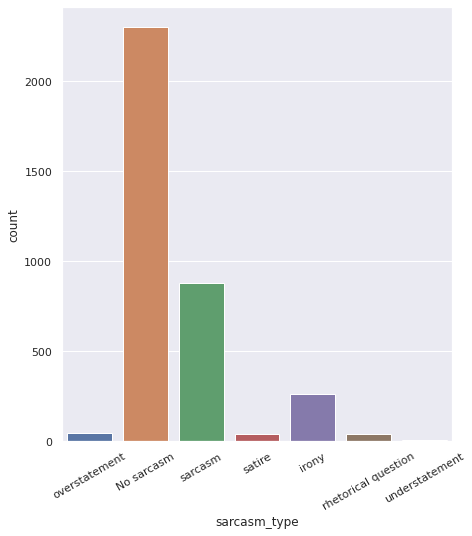

In [ ]:
sns.countplot(train.sarcasm_type)
sns.color_palette("mako", as_cmap=True)

plt.xticks(rotation=30);

**Piechart depecting sarcasm_type**

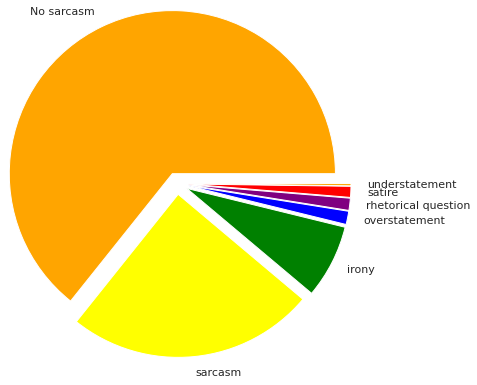

In [ ]:
# pie chart using seaborn based on total count of different sentiments in training dataset 

explode = [0.1, 0.1, 0.1, 0.1, 0.1,0.1,0.1]
sns.set_theme(style="whitegrid")
train.sarcasm_type.value_counts().plot(kind='pie',explode=explode,figsize=(5,5),radius=1.5,colors=["orange", "yellow", "green",'blue','purple','red']);


In [ ]:
train

,tweet,sarcasm_label,sarcasm_type
1654,I doubt this will be sufficient #overstatement,sarcastic,overstatement
1575,National Guardsman Who Helped Thwart Attack On...,not_sarcastic,No sarcasm
485,@HaydenPanettiere on The #Late #Show w @CraigF...,not_sarcastic,No sarcasm
769,"@NBCNews And when pigs fly, he'll make John Mc...",sarcastic,sarcasm
1466,If you don't want too worry about #dying from ...,not_sarcastic,No sarcasm
...,...,...,...
307,Find your writing center http://t.co/sU1dI5mVt...,not_sarcastic,No sarcasm
3484,#RaiseIt Brent Morel with Game Winning RBI. Wh...,sarcastic,sarcasm
2643,Bernie Sanders goes on a mission to reach cons...,not_sarcastic,No sarcasm
3251,@JhaSanjay leaders of Bihar and UP have insult...,sarcastic,irony


In [ ]:
# # Create a dataframe with the tweets data
# data = {'Tweet': train.tweet, 'Sarcasm': train.sarcasm_label}
# df = pd.DataFrame(data)

# # Create a pivot table with the sarcasm scores for each tweet
# pivot_table = df.pivot_table(index='Tweet', columns='Sarcasm', aggfunc=np.mean)

# # Create a heatmap of the pivot table
# sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')

# # Show the plot
# plt.show()


ValueError: ignored

In [ ]:
# # create a correlation matrix of the features
# corr = train.corr()

# # create the heatmap
# sns.heatmap(corr, annot=True, cmap='coolwarm')

# # show the plot
# plt.show()


In [ ]:
def clean(tweet): 
    

    # Special characters
    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÓ", "", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
    tweet = re.sub(r"JapÌ_n", "Japan", tweet)    
    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    tweet = re.sub(r"SuruÌ¤", "Suruc", tweet)
    tweet = re.sub(r"åÇ", "", tweet)
    tweet = re.sub(r"å£3million", "3 million", tweet)
    tweet = re.sub(r"åÀ", "", tweet)
    
    #emojis
    # emoji_pattern = re.compile(
    #     '['
    #     u'\U0001F600-\U0001F64F'  # emoticons
    #     u'\U0001F300-\U0001F5FF'  # symbols & pictographs
    #     u'\U0001F680-\U0001F6FF'  # transport & map symbols
    #     u'\U0001F1E0-\U0001F1FF'  # flags
    #     u'\U00002702-\U000027B0'
    #     u'\U000024C2-\U0001F251'
    #     ']+',
    #     flags=re.UNICODE)
    # tweet =  emoji_pattern.sub(r'', tweet)
    
    # usernames mentions like "@abc123"
    ment = re.compile(r"(@[A-Za-z0-9]+)")
    tweet =  ment.sub(r'', tweet)
    
    # Contractions
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)   
            
    # Character entity references
    tweet = re.sub(r"&amp;", "&", tweet)
    
    # html tags
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    tweet = re.sub(html, '', tweet)
    
    # Urls
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
    tweet = re.sub(r'https?://\S+|www\.\S+','', tweet)
        
    # #Punctuations and special characters
    
    # tweet = re.sub('[%s]' % re.escape(string.punctuation),'',tweet)
    tweet = tweet.replace("#"," ")
    tweet = tweet.lower()
    
    splits = tweet.split()
    splits = [word for word in splits if word not in set(nltk.corpus.stopwords.words('english'))]
    tweet = ' '.join(splits)

    
    
    return tweet

In [ ]:
tqdm.pandas() 

train['tweet']= train['tweet'].progress_apply((lambda x: clean(x))) 
test['tweet'] = test['tweet'].progress_apply((lambda x: clean(x)))

  0%|          | 0/3577 [00:00<?, ?it/s]

  0%|          | 0/907 [00:00<?, ?it/s]

In [ ]:
train["tweet"] = train["tweet"].apply(lambda text: re.sub(r'[^a-zA-Z0-9\s]','',text,re.I|re.A))
train.head(10)

,tweet,sarcasm_label,sarcasm_type
1654,doubt sufficient overstatement,sarcastic,overstatement
1575,national guardsman helped thwart attack french...,not_sarcastic,No sarcasm
485,late show w jfk dna mba,not_sarcastic,No sarcasm
769,pigs fly make john mccain secretary defense s...,sarcastic,sarcasm
1466,want worry dying sudep take pharm epilepsy dru...,not_sarcastic,No sarcasm
1001,professors push back laptops lecture hall new ...,not_sarcastic,No sarcasm
835,drug plane 11 people arrested 8 month investig...,not_sarcastic,No sarcasm
1653,labour election london mayoral race close call...,not_sarcastic,No sarcasm
2614,studies show turmeric effective n even better ...,not_sarcastic,No sarcasm
2263,burkey burpees absolute favorite sarcasm,sarcastic,sarcasm


In [ ]:
test["tweet"] = test["tweet"].apply(lambda text: re.sub(r'[^a-zA-Z0-9\s]','',text,re.I|re.A))
test.head(10)

,tweet,sarcasm_label,sarcasm_type
885,excited start work day union enter review room...,sarcastic,sarcasm
634,anyone caught exiting funny humor,not_sarcastic,No sarcasm
584,gsmarena lenovo outs trio entertainmentcentric...,not_sarcastic,No sarcasm
867,top blogger templates blogger education inspir...,not_sarcastic,No sarcasm
352,brockton eyes surveillance cameras fight crime...,not_sarcastic,No sarcasm
119,jeremy corbyn offers new parental rights selfe...,not_sarcastic,No sarcasm
574,disguise fool anybody lady fugitive suspense h...,not_sarcastic,No sarcasm
464,accredited investor qotd investingstrategy net...,not_sarcastic,No sarcasm
641,chilling watching late night tv purr puddy meo...,not_sarcastic,No sarcasm
355,making jokes cops walking restaurant sat right...,sarcastic,irony


In [ ]:
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

train["tweet"] = train["tweet"].apply(lambda text: remove_punctuation(text))
train.head()

,tweet,sarcasm_label,sarcasm_type
1654,doubt sufficient overstatement,sarcastic,overstatement
1575,national guardsman helped thwart attack french...,not_sarcastic,No sarcasm
485,late show w jfk dna mba,not_sarcastic,No sarcasm
769,pigs fly make john mccain secretary defense s...,sarcastic,sarcasm
1466,want worry dying sudep take pharm epilepsy dru...,not_sarcastic,No sarcasm


In [ ]:

# PUNCT_TO_REMOVE = string.punctuation
# def remove_punctuation(text):
#     """custom function to remove the punctuation"""
#     return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

test["tweet"] = test["tweet"].apply(lambda text: remove_punctuation(text))
test.head()

,tweet,sarcasm_label,sarcasm_type
885,excited start work day union enter review room...,sarcastic,sarcasm
634,anyone caught exiting funny humor,not_sarcastic,No sarcasm
584,gsmarena lenovo outs trio entertainmentcentric...,not_sarcastic,No sarcasm
867,top blogger templates blogger education inspir...,not_sarcastic,No sarcasm
352,brockton eyes surveillance cameras fight crime...,not_sarcastic,No sarcasm


In [ ]:
train.drop("sarcasm_type",inplace=True,axis=1)
test.drop("sarcasm_type",inplace=True,axis=1)


In [ ]:
train = train.sort_index(ascending=True)

train.tail(10) 


,tweet,sarcasm_label
3567,obama cameron hollande merkel presiding regime...,sarcastic
3568,cnn hosts gopdebate sept16th join us postdebat...,not_sarcastic
3569,video building tower 3000 shops bbc news uk ne...,not_sarcastic
3570,news actuality tweet shows escaped el chapo dr...,not_sarcastic
3571,rx drugs oval white pill n 60 yes 60mg morphi...,not_sarcastic
3572,hey christine nixon people like cover every si...,not_sarcastic
3573,erythropoietin drugs market reach 119 billion ...,not_sarcastic
3574,apples first android app wants stop using andr...,sarcastic
3575,hurry ending soon follow b4 160915 4chance2win...,not_sarcastic
3576,alcohol drug treatment court accept people rac...,not_sarcastic


In [ ]:
test = test.sort_index(ascending=True)

test.tail(10) 

,tweet,sarcasm_label
897,n korean womans family says kidnapped abroad a...,not_sarcastic
898,tyonews us announces 19m grants expand use bod...,not_sarcastic
899,whitehouse fire company welcomes new engine 22...,not_sarcastic
900,new edition read todays good news online fam...,not_sarcastic
901,learn safety privacy article safety education ...,not_sarcastic
902,subject likely prominent next gopdebate wise s...,not_sarcastic
903,get rid best education suggestion,not_sarcastic
904,top blogger templates blogger education inspir...,not_sarcastic
905,politics football iowa politics,not_sarcastic
906,plan remove damaged bridge causes stir white m...,not_sarcastic


In [ ]:
train.isnull().sum()

tweet            0
sarcasm_label    0
dtype: int64

In [ ]:
train.shape

(3577, 2)

In [ ]:
corr

""


In [ ]:
# # create a correlation matrix of the features
# corr = train["tweet"].corr(train["sarcasm_label"])

# # create the heatmap
# sns.heatmap(corr, annot=True, cmap='coolwarm')

# # show the plot
# plt.show()

TypeError: ignored

In [ ]:
# from transformers import pipeline

# # Instantiate the sarcasm detection model
# sarcasm_detector = pipeline('text-classification', model='distilbert-base-cased-distilled-squad')

# # Generate sarcasm scores for a list of tweets
# sarcasm_scores = sarcasm_detector(train.tweet)

# # Extract the scores from the output
# sarcasm_scores = [score['label_probability'][1] for score in sarcasm_scores]


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 3576
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet          3577 non-null   object
 1   sarcasm_label  3577 non-null   object
dtypes: object(2)
memory usage: 83.8+ KB


In [ ]:
# # Saving a DataFrame column
# train['tweet']=train['tweet'].to_string()


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 3576
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet          3577 non-null   object
 1   sarcasm_label  3577 non-null   object
dtypes: object(2)
memory usage: 83.8+ KB


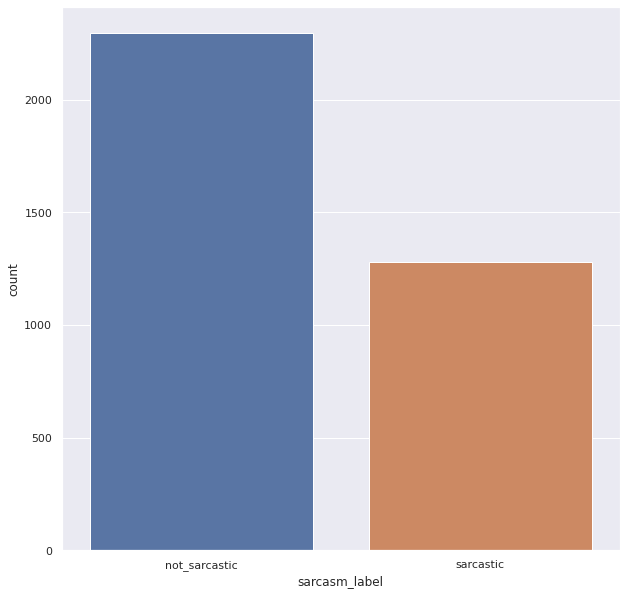

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(train['sarcasm_label'])

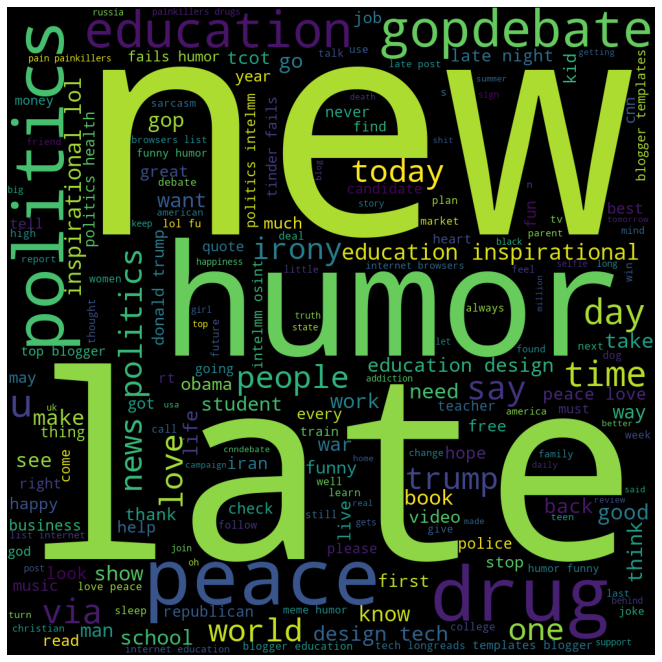

In [ ]:
start_all_words=''
stopwords= set(STOPWORDS)
for word in train.tweet[train['sarcasm_label']=='not_sarcastic']:
    start_all_words=start_all_words + word + ' '
start_wordcloud=WordCloud(background_color='black',stopwords=stopwords,
                         min_font_size=5,width=1000, height=1000).generate(start_all_words)
# clean_all_words=''
# for newword in train.tweet:
#     clean_all_words= clean_all_words + newword + ' '
# clean_wordcloud=WordCloud(width=1000,height=1000,
#                          background_color='white',stopwords=stopwords,
#                          min_font_size=10).generate(clean_all_words)

plt.figure(1,figsize=(18,15))
plt.subplot(121)
plt.imshow(start_wordcloud)
# plt.subplot(122)
# plt.imshow(clean_all_words)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show();

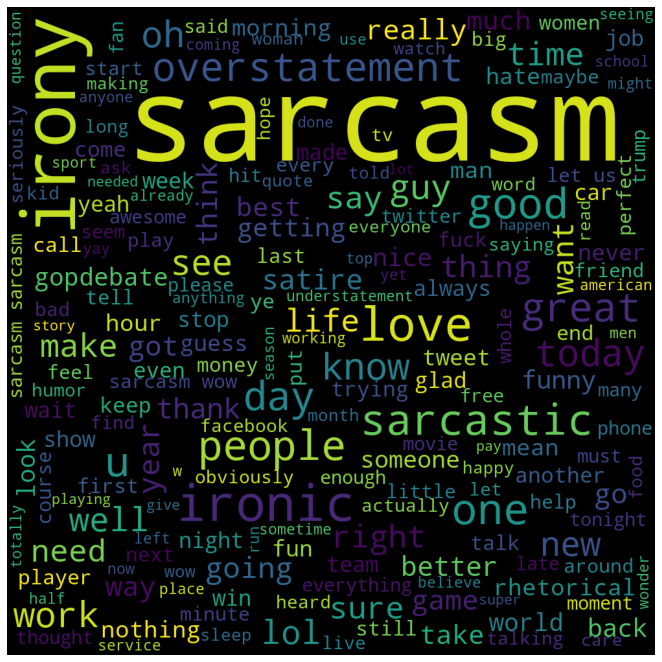

In [ ]:
start_all_words=''
stopwords= set(STOPWORDS)
for word in train.tweet[train['sarcasm_label']=='sarcastic']:
    start_all_words=start_all_words + word + ' '
start_wordcloud=WordCloud(
                         background_color='black',stopwords=stopwords,
                         min_font_size=5,width=1000, height=1000).generate(start_all_words)
# clean_all_words=''
# for newword in train.tweet:
#     clean_all_words= clean_all_words + newword + ' '
# clean_wordcloud=WordCloud(width=1000,height=1000,
#                          background_color='white',stopwords=stopwords,
#                          min_font_size=10).generate(clean_all_words)

plt.figure(1,figsize=(18,15))
plt.subplot(121)
plt.imshow(start_wordcloud)
# plt.subplot(122)
# plt.imshow(clean_all_words)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show();

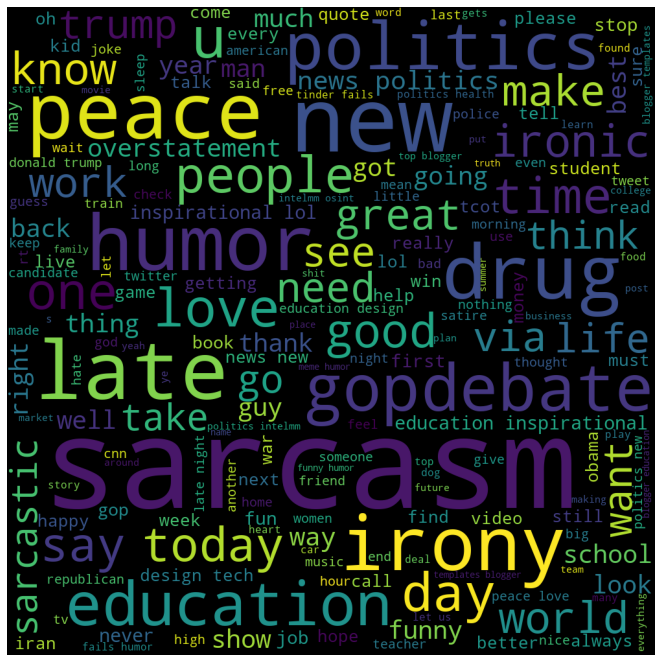

In [ ]:
start_all_words=''
stopwords= set(STOPWORDS)
for word in train.tweet:
    start_all_words=start_all_words + word + ' '
start_wordcloud=WordCloud(width=1000,height=1000,
                         background_color='black',stopwords=stopwords,
                         min_font_size=5).generate(start_all_words)
# clean_all_words=''
# for newword in train.tweet:
#     clean_all_words= clean_all_words + newword + ' '
# clean_wordcloud=WordCloud(width=1000,height=1000,
#                          background_color='white',stopwords=stopwords,
#                          min_font_size=10).generate(clean_all_words)

plt.figure(1,figsize=(18,15))
plt.subplot(121)
plt.imshow(start_wordcloud)
# plt.subplot(122)
# plt.imshow(clean_all_words)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show();

In [ ]:
def encode_target(t_class):
    t_class=str(t_class)
    class_dict = {
        'not_sarcastic':0,
        'sarcastic':1
    }
    return class_dict[t_class]

In [ ]:
train["target"] = train['sarcasm_label'].apply(lambda x: encode_target(x))
test["target"] = test['sarcasm_label'].apply(lambda x: encode_target(x))

In [ ]:
train = train[['tweet','target']]
train.columns = ['text','labels']

test = test[['tweet','target']]
test.columns = ['text','labels']

In [ ]:
train.head()

,text,labels
0,since visited grandparents wait,0
1,well done monty mark first ever 100 honest acc...,0
2,since fantasy individual time alive today,0
3,really think know talking about please provide...,0
4,missed toughenough tonight worries watch episo...,1


In [ ]:
test.head()

,text,labels
0,gandhis busy congress delays brainstorming ses...,1
1,george ice cream castle charlie wolf educatio...,0
2,hartford house delegation scores funding city ...,0
3,obama rename tallest us peak hear white house ...,0
4,couldnt care less guess oh cant forget right ...,1


In [ ]:
# model = ClassificationModel(
#     "bert", "dbmdz/bert-base-turkish-cased",
#     num_labels=4,
#     args=model_args
# )

In [ ]:
model_type = 'distilbert'
model_name = 'distilbert-base-uncased'
seed = 100
model_args =  {'fp16': False,
               'train_batch_size': 128,
               'gradient_accumulation_steps': 2,
#                'do_lower_case': True,
               'learning_rate': 1e-5,
               'overwrite_output_dir': True,
               'manual_seed': seed,
               'num_train_epochs': 1}


In [ ]:
model = ClassificationModel(model_type, model_name,num_labels=4,args=model_args,use_cuda=False) 
# model = ClassificationModel(
#     "bert", "dbmdz/bert-base-turkish-cased",
#     num_labels=4,
#     args=train_args
# ) 
#args=model_args


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.weight', 'classifier

In [ ]:
model.train_model(train,acc=accuracy_score)

  0%|          | 0/3577 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/28 [00:00<?, ?it/s]

(14, 1.2729303879397256)

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(test,acc=accuracy_score)

  0%|          | 0/907 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/114 [00:00<?, ?it/s]

In [ ]:
result

{'mcc': 0.0, 'acc': 0.7056229327453142, 'eval_loss': 1.2070792714754741}

In [ ]:
print("TEST SET EVALUATION:")
print("====================================")
print("%s: %.2f%%" % ('Accuracy', result['acc']*100))
print("%s: %.5f" % ('Final Loss', result['eval_loss']))

TEST SET EVALUATION:
Accuracy: 70.56%
Final Loss: 1.20708


In [ ]:
questions = pd.read_csv("/content/I-Sarcasm_train_.csv",usecols=["tweet", "sarcasm_label"])
# questions.columns = ["tweet", "sarcasm_label"]
questions.head()

,tweet,sarcasm_label
0,It's been a while since I visited my grandpare...,not_sarcastic
1,Well done Monty. Mark that up as your first ev...,not_sarcastic
2,@davesnyder since this is fantasy can it be an...,not_sarcastic
3,Really? I don't think you know what you are ta...,not_sarcastic
4,Missed #ToughEnough tonight? No worries. Just ...,sarcastic


In [ ]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

questions = standardize_text(questions, "tweet")

questions.to_csv("clean_data.csv")
questions.head()

,tweet,sarcasm_label
0,it's been a while since i visited my grandpare...,not_sarcastic
1,well done monty mark that up as your first ev...,not_sarcastic
2,since this is fantasy can it be any individua...,not_sarcastic
3,really? i don't think you know what you are ta...,not_sarcastic
4,missed toughenough tonight? no worries just ...,sarcastic


In [ ]:
clean_questions = pd.read_csv("clean_data.csv")

clean_questions.tail()

,Unnamed: 0,tweet,sarcasm_label
3572,3572,"hey christine nixon, people like cover every ...",not_sarcastic
3573,3573,erythropoietin drugs market to reach 11 9 b...,not_sarcastic
3574,3574,apple's first android app wants you to stop us...,sarcastic
3575,3575,hurry! ending soon! follow b4 16 09 15 4chance...,not_sarcastic
3576,3576,alcohol and drug treatment court to accept mor...,not_sarcastic


In [ ]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

clean_questions["tokens"] = clean_questions["tweet"].apply(str).apply(tokenizer.tokenize)
clean_questions.head()

,Unnamed: 0,tweet,sarcasm_label,tokens
0,0,it's been a while since i visited my grandpare...,not_sarcastic,"[it, s, been, a, while, since, i, visited, my,..."
1,1,well done monty mark that up as your first ev...,not_sarcastic,"[well, done, monty, mark, that, up, as, your, ..."
2,2,since this is fantasy can it be any individua...,not_sarcastic,"[since, this, is, fantasy, can, it, be, any, i..."
3,3,really? i don't think you know what you are ta...,not_sarcastic,"[really, i, don, t, think, you, know, what, yo..."
4,4,missed toughenough tonight? no worries just ...,sarcastic,"[missed, toughenough, tonight, no, worries, ju..."


In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
all_words = [word for tokens in clean_questions["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in clean_questions["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

50696 words total, with a vocabulary size of 10432
Max sentence length is 41


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,HashingVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics

In [ ]:
traintexts=train['text'].tolist()
testtexts=test['text'].tolist()

all_texts = traintexts + testtexts

In [ ]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(all_texts)

# transform the training and test data using count vectorizer object
xtrain_count =  count_vect.transform(train['text'])
xtest_count =  count_vect.transform(test['text'])

In [ ]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=55000)
tfidf_vect.fit(all_texts)
xtrain_tfidf =  tfidf_vect.transform(train['text'])
xtest_tfidf =  tfidf_vect.transform(test['text'])

In [ ]:
hash_vectorizer = HashingVectorizer(n_features=55000)
hash_vectorizer.fit(all_texts)
xtrain_hash_vectorizer =  hash_vectorizer.transform(train['text']) 
xtest_hash_vectorizer =  hash_vectorizer.transform(test['text'])

In [ ]:
def train_model(classifier, feature_vector_train, label, feature_vector_test, test_y):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_test)
    
    return metrics.accuracy_score(predictions, test_y)

In [ ]:
print("NAIVE BAYES CLASSIFIER")
print("========================================================")
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train['labels'], xtest_count, test['labels'])
print("-> Count Vectors Accuracy: {}% ".format(round(accuracy,4)*100))

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train['labels'], xtest_tfidf, test['labels'])
print("-> WordLevel TF-IDF Accuracy: {}%".format(round(accuracy,4)*100))

# Naive Bayes on Hash Vectors
# accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_hash_vectorizer, train['labels'], xtest_hash_vectorizer, test['labels'])
# print("-> Hash Vectors Accuracy: ", round(accuracy,2))

NAIVE BAYES CLASSIFIER
-> Count Vectors Accuracy: 95.81% 
-> WordLevel TF-IDF Accuracy: 89.64%


In [ ]:
classifier=naive_bayes.MultinomialNB()
classifier.fit(xtrain_count, train['labels'])
    
    # predict the labels on validation dataset
predictions = classifier.predict(xtest_count)
    
# metrics.accuracy_score(predictions, test_y)

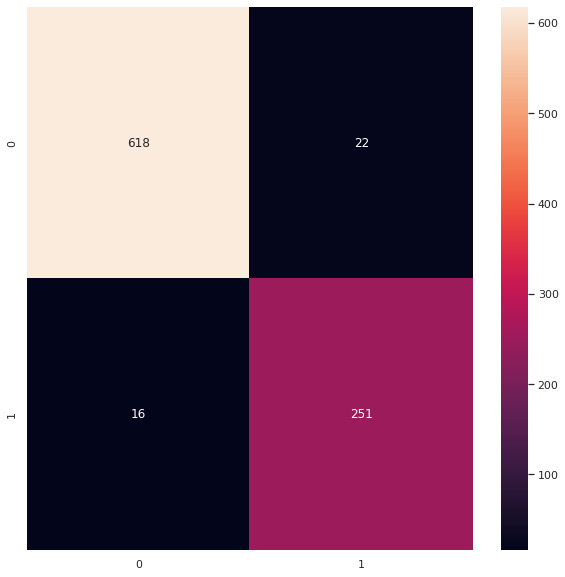

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Get the confusion matrix
confusion_matrix = confusion_matrix(test.labels, predictions)

# Visualize the confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d')

In [ ]:
import xgboost
print("XGBOOST CLASSIFIER")
print("========================================================")
# Linear Classifier on Count Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_count, train['labels'], xtest_count, test['labels'])
print("-> Count Vectors Accuracy: {}% ".format(round(accuracy,4)*100))

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf, train['labels'], xtest_tfidf, test['labels'])
print("-> WordLevel TF-IDF Accuracy: {}%".format(round(accuracy,4)*100))

# Linear Classifier on Hash Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_hash_vectorizer, train['labels'], xtest_hash_vectorizer, test['labels'])
print("-> Hash Vectors Accuracy: {}%".format(round(accuracy,4)*100))

XGBOOST CLASSIFIER
-> Count Vectors Accuracy: 98.35000000000001% 
-> WordLevel TF-IDF Accuracy: 98.24000000000001%
-> Hash Vectors Accuracy: 98.13%


In [ ]:
from sklearn.metrics import f1_score, precision_score

f1 = f1_score(test['labels'], predictions, average='macro')
precision = precision_score(test['labels'], predictions, average='macro')

print("-> F1 Score: {}".format(round(f1, 4)))
print("-> Precision: {}".format(round(precision, 4)))


-> F1 Score: 0.9499
-> Precision: 0.9471


In [ ]:
model = ClassificationModel(
    "bert", "dbmdz/bert-base-turkish-cased",
    num_labels=4,
    args=model_args,use_cuda=False
)

In [ ]:
# model.train_model(train,acc=accuracy_score)